In [ ]:
!pip install rake-nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('all')
!pip install keybert

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Un

True

In [ ]:
from textblob import TextBlob
import nltk
import re
import string, sys, os
from rake_nltk import Rake
from nltk.tokenize import word_tokenize, sent_tokenize
import io
from io import StringIO
import sys
import random
from transformers import pipeline

questions = []
answers = []
choices = []

def find_key(sent, tagged_list):
    flag = 0
    for tag in tagged_list:
        if(tag[1] == 'NNP'):
            key_word = tag[0]
            flag = 1
            break
    if(flag == 0):
        for tag in tagged_list:
            if(tag[1] == 'NNPS'):
                key_word = tag[0]
                flag = 1
                break
    if(flag == 0):
        for tag in tagged_list:
            if(tag[1] == 'NN'):
                key_word = tag[0]
                flag = 1
                break
    if(flag == 0):
        for tag in tagged_list:
            if(tag[1] == 'NNS'):
                key_word = tag[0]
                flag = 1
                break

    if(flag == 1):
        display(sent, key_word)

def display(qtn, ans):
    blank = '________'
    qtn = re.sub(ans, blank, qtn, 1, flags=re.IGNORECASE)
    mc = []
    disp_mc = []
    mc = random.sample(choices, 3)
    mc.append(ans)
    disp_mc = random.sample(mc, 4)

    print("Q:", qtn)
    i = 1
    for choice in disp_mc:
        print(i, ".", choice)
        i = i + 1
    print("\nAns:", ans, "\n")

    questions.append(qtn)
    answers.append(ans)
    outF = open('questions.txt', "a")
    outF.write("Q:")
    outF.write(qtn)
    outF.write("\n")
    outF.write("Options:")
    outF.write(str(disp_mc))
    outF.write("\nAns:")
    outF.write(ans)
    outF.write("\n\n")
    outF.close()

# Read summary into text and tokenize text into sentences in collection
filename = sys.argv[1]
with open("/content/input.txt") as f:
    text = f.read()
f.close()
collection = sent_tokenize(text)

# Find noun keywords from text using TextBlob
blob = TextBlob(text)
keywords = blob.noun_phrases

for keyword in keywords:
    choices.append(keyword)

# Create a T5 question answering pipeline
qa_pipeline = pipeline("question-answering", model="t5-base", tokenizer="t5-base")

# Find the relevant keywords from each sentence
r = Rake(min_length=1, max_length=1)
for collec in collection:
    r.extract_keywords_from_text(collec)
    if(r.get_ranked_phrases()):
        phrase_list = r.get_ranked_phrases()
        tagged = nltk.pos_tag(phrase_list)
        find_key(collec, tagged)
        # Use T5 to answer a question about the sentence
        result = qa_pipeline({
            "context": collec,
            "question": "What is the main idea of this sentence?"
        })
        main_idea = result["answer"]
        print("Main Idea:", main_idea)

Some weights of T5ForQuestionAnswering were not initialized from the model checkpoint at t5-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Q: Harry Potter is a ________ of seven fantasy novels written by British author J. K. Rowling.
1 . new information
2 . harry potter
3 . series
4 . harry potter

Ans: series 

Main Idea: Harry Potter is a
Q: The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and ________.
1 . commercial success worldwide
2 . j. k. rowling
3 . wizardry
4 . studio tour

Ans: wizardry 

Main Idea: novels chronicle the lives of a
Q: The main story arc concerns Harry's conflict with Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (________-magical people).
1 . harry potter
2 . dark wizard
3 . total value
4 . non

Ans: non 

Main Idea: The main story arc concerns Harry's conflict with Lord Voldemort,
Q: The ________ was originally published in English by Bloomsbury in the 

In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(text_without_period,text)
print(f"ROUGE Scores: {scores}")

ROUGE Scores: {'rouge1': Score(precision=0.8893805309734514, recall=1.0, fmeasure=0.9414519906323184), 'rouge2': Score(precision=0.8603104212860311, recall=0.9675810473815462, fmeasure=0.9107981220657276), 'rougeL': Score(precision=0.8893805309734514, recall=1.0, fmeasure=0.9414519906323184)}


In [ ]:
from textblob import TextBlob
import nltk
import re
import string,sys,os
from rake_nltk import Rake
from nltk.tokenize import word_tokenize,sent_tokenize
import io
from io import StringIO
import sys
import random

questions=[]
answers=[]
choices=[]

def find_key(sent,tagged_list):
    flag=0
    for tag in tagged_list:
        if(tag[1]=='NNP'):
            key_word=tag[0]
            flag=1
            break
    if(flag==0):
        for tag in tagged_list:
            if(tag[1]=='NNPS'):
                key_word=tag[0]
                flag=1
                break
    if(flag==0):
        for tag in tagged_list:
            if(tag[1]=='NN'):
                key_word=tag[0]
                flag=1
                break
    if(flag==0):
        for tag in tagged_list:
            if(tag[1]=='NNS'):
                key_word=tag[0]
                flag=1
                break
    #tagged_list_copy=tagged_list
    if(flag==1):
        display(sent,key_word)

def display(qtn,ans):
    blank='________'
    qtn = re.sub(ans, blank, qtn, 1, flags=re.IGNORECASE)
    #qtn=str.replace(qtn,ans,blank)
    mc=[]
    disp_mc=[]
    mc=random.sample(choices, 3)
    mc.append(ans)
    disp_mc=random.sample(mc, 4)
    print("Q:",qtn)
    i=1
    for choice in disp_mc:
        print(i,".",choice)
        i=i+1
    print("\nAns:",ans,"\n")
    questions.append(qtn)
    answers.append(ans)
    outF = open('questions.txt',"a")
    outF.write("Q:")
    outF.write(qtn)
    outF.write("\n")
    outF.write("Options:")
    outF.write(str(disp_mc))
    outF.write("\nAns:")
    outF.write(ans)
    outF.write("\n\n")
    outF.close()


filename=sys.argv[1]
with open("/content/input.txt") as f:
            text=f.read()
f.close()
collection=sent_tokenize(text)

#find noun keywords from text
r = Rake(min_length=1, max_length=1)
r.extract_keywords_from_text(text)
text_keys=r.get_ranked_phrases()
text_keys_tagged=nltk.pos_tag(text_keys)
for tag_key in text_keys_tagged:
    if(tag_key[1]=='NNP'):
        choices.append(tag_key[0])
    if(tag_key[1]=='NNPS'):
       choices.append(tag_key[0])
    if(tag_key[1]=='NN'):
        choices.append(tag_key[0])
    if(tag_key[1]=='NNS'):
        choices.append(tag_key[0])

#find the relevant keywords from each sentence
r = Rake(min_length=1, max_length=1)
for collec in collection:
    r.extract_keywords_from_text(collec)
    if(r.get_ranked_phrases()):
        phrase_list=r.get_ranked_phrases()
        tagged=nltk.pos_tag(phrase_list)
        #print(collec,"\t",tagged,"\n")
        find_key(collec,tagged)

Q: Harry Potter is a ________ of seven fantasy novels written by British author J. K. Rowling.
1 . series
2 . expand
3 . drama
4 . history

Ans: series 

Q: The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and ________.
1 . find
2 . wizardry
3 . overthrow
4 . thriller

Ans: wizardry 

Q: The main story arc concerns Harry's conflict with Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (________-magical people).
1 . non
2 . spin
3 . series
4 . conflict

Ans: non 

Q: The ________ was originally published in English by Bloomsbury in the United Kingdom and Scholastic Press in the United States.
1 . series
2 . time
3 . adventure
4 . history

Ans: series 

Q: A series of many genres, including fantasy, drama, coming-of-age fiction, and the British schoo

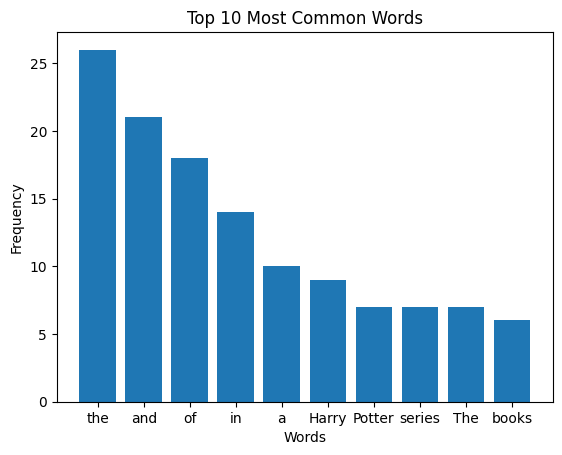

Total words: 432
Unique words: 260
Top 10 most common words:
the: 26
and: 21
of: 18
in: 14
a: 10
Harry: 9
Potter: 7
series: 7
The: 7
books: 6


In [ ]:
import string
from collections import Counter
import matplotlib.pyplot as plt
# statistical analysis before cleaning the data
# Read content from the text file
file_path = "/content/input.txt"
with open(file_path, "r", encoding="utf-8") as file:
    content = file.read()

# Tokenize the text into words (assuming whitespace separation)
words = content.split()

# Calculate word frequency using Counter
word_frequency = Counter(words)

# Basic statistics
total_words = len(words)
unique_words = len(word_frequency)
most_common_words = word_frequency.most_common(10)

# Plot a bar chart of the most common words
plt.bar(*zip(*most_common_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.show()

# Print statistics
print(f"Total words: {total_words}")
print(f"Unique words: {unique_words}")
print("Top 10 most common words:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")


In [ ]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.7 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39124 sha256=bff5823605626e1fd58371a9c5dd0a069e2709e9f44d68d4521a87456a7d97f9
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8ee8b1de721262d8493d4f911aeeaba95e70d903d076b2dc6dd78207c9329457
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built keybert sentence-transformers


In [ ]:
from textblob import TextBlob
import nltk
import re
import string, sys, os
from rake_nltk import Rake
from nltk.tokenize import word_tokenize, sent_tokenize
import io
from io import StringIO
import sys
import random
from transformers import pipeline
from keybert import KeyBERT

questions = []
answers = []
choices = []

def find_key(sent, tagged_list):
    flag = 0
    for tag in tagged_list:
        if(tag[1] == 'NNP'):
            key_word = tag[0]
            flag = 1
            break
    if(flag == 0):
        for tag in tagged_list:
            if(tag[1] == 'NNPS'):
                key_word = tag[0]
                flag = 1
                break
    if(flag == 0):
        for tag in tagged_list:
            if(tag[1] == 'NN'):
                key_word = tag[0]
                flag = 1
                break
    if(flag == 0):
        for tag in tagged_list:
            if(tag[1] == 'NNS'):
                key_word = tag[0]
                flag = 1
                break

    if(flag == 1):
        display(sent, key_word)

def display(qtn, ans):
    blank = '________'
    qtn = re.sub(ans, blank, qtn, 1, flags=re.IGNORECASE)
    mc = []
    disp_mc = []
    mc = random.sample(choices, 3)
    mc.append(ans)
    disp_mc = random.sample(mc, 4)

    print("Q:", qtn)
    i = 1
    for choice in disp_mc:
        print(i, ".", choice)
        i = i + 1
    print("\nAns:", ans, "\n")

    questions.append(qtn)
    answers.append(ans)
    outF = open('questions.txt', "a")
    outF.write("Q:")
    outF.write(qtn)
    outF.write("\n")
    outF.write("Options:")
    outF.write(str(disp_mc))
    outF.write("\nAns:")
    outF.write(ans)
    outF.write("\n\n")
    outF.close()

# Read summary into text and tokenize text into sentences in collection
filename = sys.argv[1]
with open("/content/input.txt") as f:
    text = f.read()
f.close()
collection = sent_tokenize(text)

# Find noun keywords from text using KeyBERT
model = KeyBERT()
keywords = model.extract_keywords(text)

for keyword in keywords:
    choices.append(keyword[0])

# Create a T5 question answering pipeline
qa_pipeline = pipeline("question-answering", model="t5-base", tokenizer="t5-base")

# Find the relevant keywords from each sentence
r = Rake(min_length=1, max_length=1)
for collec in collection:
    r.extract_keywords_from_text(collec)
    if(r.get_ranked_phrases()):
        phrase_list = r.get_ranked_phrases()
        tagged = nltk.pos_tag(phrase_list)
        find_key(collec, tagged)
        # Use T5 to answer a question about the sentence
        result = qa_pipeline({
            "context": collec,
            "question": "What is the main idea of this sentence?"
        })
        main_idea = result["answer"]
        print("Main Idea:", main_idea)

Some weights of T5ForQuestionAnswering were not initialized from the model checkpoint at t5-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Q: Harry Potter is a ________ of seven fantasy novels written by British author J. K. Rowling.
1 . hogwarts
2 . wizards
3 . harry
4 . series

Ans: series 

Main Idea: a series of seven fantasy novels
Q: The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and ________.
1 . wizardry
2 . hogwarts
3 . wizardry
4 . wizards

Ans: wizardry 

Main Idea: wizard, Harry Potter, and his friends
Q: The main story arc concerns Harry's conflict with Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (________-magical people).
1 . harry
2 . wizards
3 . potter
4 . non

Ans: non 

Main Idea: who intends to become immortal, overthrow
Q: The ________ was originally published in English by Bloomsbury in the United Kingdom and Scholastic Press in the United States.
1 . wizar

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:

def evaluate(questions, answers):
    correct = 0
    total = len(questions)

    for i in range(total):
        user_input = input("Q: " + questions[i] + "\nYour answer: ")
        if user_input.lower() == answers[i].lower():
            correct += 1

    accuracy = (correct / total) * 100
    print("Accuracy: ", accuracy, "%")

# Rest of your code...

# After generating the questions and answers
evaluate(questions, answers)

Q: Harry Potter is a ________ of seven fantasy novels written by British author J. K. Rowling.
Your answer: book


KeyboardInterrupt: ignored

In [ ]:
# installing the library to evaluate the model
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=7a7a831088b4f7a97216cbab831b7227040d6335ecb49e73f0ec4a9ba485168d
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
# Convert txt file to string
file_path = "/content/input.txt"

with open(file_path, "r", encoding="utf-8") as file:
    file_content = file.read()

In [ ]:
# Convert questions list into string
string_questions = ''.join(questions)

In [ ]:
# variable to save the questions without underscore
text_with_underscores = string_questions

# Remove underscores using replace
text_without_underscores = text_with_underscores.replace("_", "")

In [ ]:
# variable to save the questions without periods
text_with_period = text_without_underscores

# Remove period using replace
text_without_period = text_with_period.replace(".", " ")

In [ ]:
import re

# variable to save file content
text = file_content

# Convert everything to lowercase.
text = text.lower()

# Define a regular expression pattern to match non-alphanumeric characters
NON_ALPHANUM_RE = re.compile(r'[^a-zA-Z0-9]')

# Replace any non-alpha-numeric characters with spaces.
text = NON_ALPHANUM_RE.sub(" ", text)


In [ ]:
import re

# variable to save cleaned questions
textQ = text_without_period

# Convert everything to lowercase.
textQ = text.lower()

# Define a regular expression pattern to match non-alphanumeric characters
NON_ALPHANUM_RE = re.compile(r'[^a-zA-Z0-9]')

# Replace any non-alpha-numeric characters with spaces.
textQ = NON_ALPHANUM_RE.sub(" ", textQ)

# Now, 'text' contains the modified string with lowercase and non-alphanumeric characters replaced by spaces.
print(textQ)

harry potter is a series of seven fantasy novels written by british author j  k  rowling  the novels chronicle the lives of a young wizard  harry potter  and his friends hermione granger and ron weasley  all of whom are students at hogwarts school of witchcraft and wizardry  the main story arc concerns harry s conflict with lord voldemort  a dark wizard who intends to become immortal  overthrow the wizard governing body known as the ministry of magic  and subjugate all wizards and muggles  non magical people    the series was originally published in english by bloomsbury in the united kingdom and scholastic press in the united states  a series of many genres  including fantasy  drama  coming of age fiction  and the british school story  which includes elements of mystery  thriller  adventure  horror  and romance   the world of harry potter explores numerous themes and includes many cultural meanings and references  1  major themes in the series include prejudice  corruption  madness  a